In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , tree
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score ,classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler

In [79]:
data = sns.load_dataset('iris')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [80]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [81]:
data['new_species'] = data['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [82]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,new_species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [83]:
data['new_species'].unique()

array([0, 1, 2], dtype=int64)

<h3>Linear Regression</h3>

In [84]:
# from sklearn.model_selection import train_test_split
x = data.iloc[:,0:4].values
x_train,x_test,y_train,y_test = train_test_split(x,data.new_species,test_size=0.3)

In [85]:
# from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [86]:
y_pred = model.predict(x_test)
y_pred

array([ 1.48632698,  1.93004871,  1.81728014, -0.28275953,  1.76762157,
        1.29654047,  1.53768778, -0.03957365,  1.35831333,  0.05937278,
        0.11230679,  1.79330981,  1.04137492,  0.04030113,  1.2646531 ,
       -0.08836041, -0.06127496,  1.63743029, -0.05556128, -0.06629729,
        1.21854719,  2.12389787,  0.95896396,  0.84831295,  1.79908028,
        0.12915617, -0.03049874,  0.92731594,  1.72329596,  1.89835066,
        0.22558863,  1.07869316,  1.57851754,  0.03758569,  1.22549449,
        1.28055612,  1.2150892 ,  1.2751631 ,  1.33877633,  1.16653172,
        0.18052374,  0.00809987,  0.99337745,  1.70960845,  1.7097599 ])

In [87]:
model.score(x_test,y_test)

0.9079334775340375

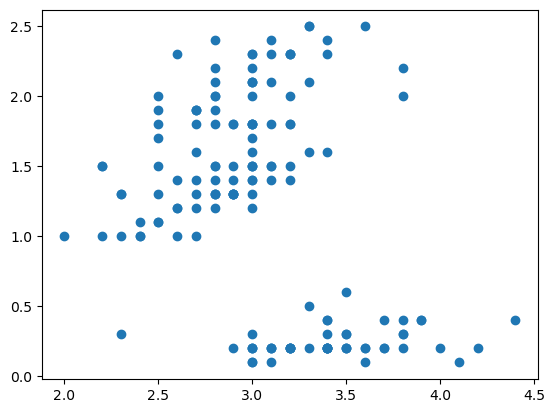

In [88]:
plt.scatter(data['sepal_width'],data['petal_width'])

<h3>Logistic Regression </h3>

In [89]:
# from sklearn.model_selection import train_test_split
x = data.iloc[:,0:4].values
x_train,x_test,y_train,y_test = train_test_split(x,data.species,test_size=0.3)

In [90]:
# from sklearn.linear_model import LinearRegression , LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [91]:
y_pred = model.predict(x_test)
y_pred

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa'],
      dtype=object)

In [92]:
logi_accu = accuracy_score(y_test,y_pred)
logi_accu

0.9333333333333333

In [93]:
model.score(x_test,y_test)

0.9333333333333333

In [94]:
precision_score(y_test,y_pred,average = 'weighted')

0.9352733686067018

In [95]:
recall_score(y_test,y_pred,average = 'weighted')

0.9333333333333333

In [96]:
f1_score(y_test,y_pred,average = 'weighted')

0.933667000333667

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      0.92      0.89        13
   virginica       0.94      0.89      0.92        19

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



In [98]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 17]], dtype=int64)

Text(70.72222222222221, 0.5, 'fefef')

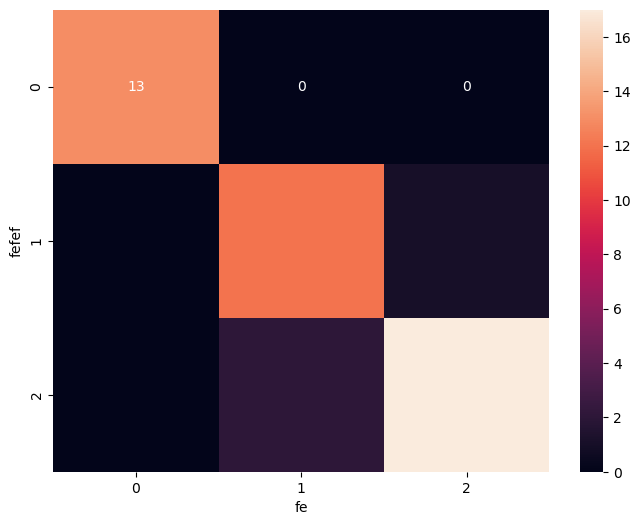

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.xlabel('fe')
plt.ylabel('fefef')

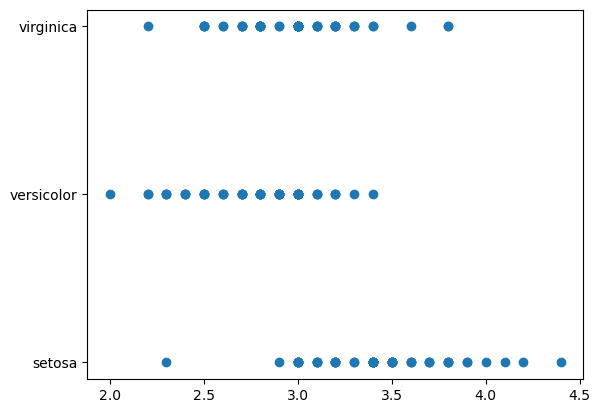

In [100]:
plt.scatter(data['sepal_width'],data.species)

<h3>SVM</h3>

In [101]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [102]:
y_pred = model.predict(x_test)
y_pred

array(['versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa'],
      dtype=object)

In [103]:
svm_accu = accuracy_score(y_test,y_pred)
svm_accu

0.9333333333333333

In [104]:
model.score(x_test,y_test)

0.9333333333333333

In [105]:
precision_score(y_test,y_pred,average='weighted')

0.9458333333333333

In [106]:
recall_score(y_test,y_pred,average='weighted')

0.9333333333333333

In [107]:
f1_score(y_test,y_pred,average='weighted')

0.9339244663382595

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45



In [109]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 16]], dtype=int64)

<Axes: >

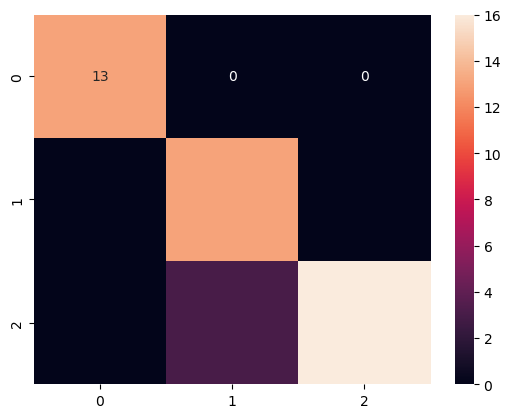

In [110]:
sns.heatmap(cm,annot=True)

<h3>Decision Tree</h3>

In [111]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [112]:
y_pred = model.predict(x_test)
y_pred

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa'],
      dtype=object)

In [113]:
dec_accu = accuracy_score(y_test,y_pred)
dec_accu

0.9111111111111111

In [114]:
model.score(x_test,y_test)

0.9111111111111111

In [115]:
precision_score(y_test,y_pred,average='weighted')

0.9173856209150326

In [116]:
recall_score(y_test,y_pred,average='weighted')

0.9111111111111111

In [117]:
f1_score(y_test,y_pred,average='weighted')

0.9118165784832452

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.80      0.92      0.86        13
   virginica       0.94      0.84      0.89        19

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.92        45
weighted avg       0.92      0.91      0.91        45



In [119]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  3, 16]], dtype=int64)

<Axes: >

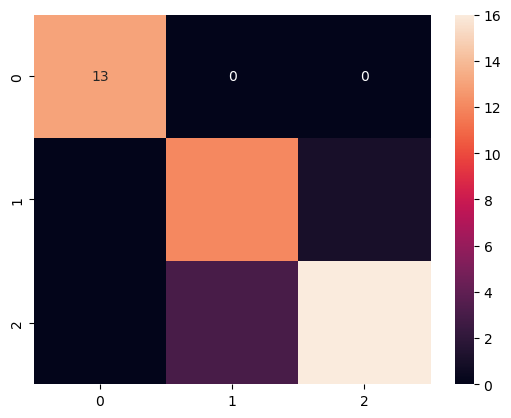

In [120]:
sns.heatmap(cm,annot=True)

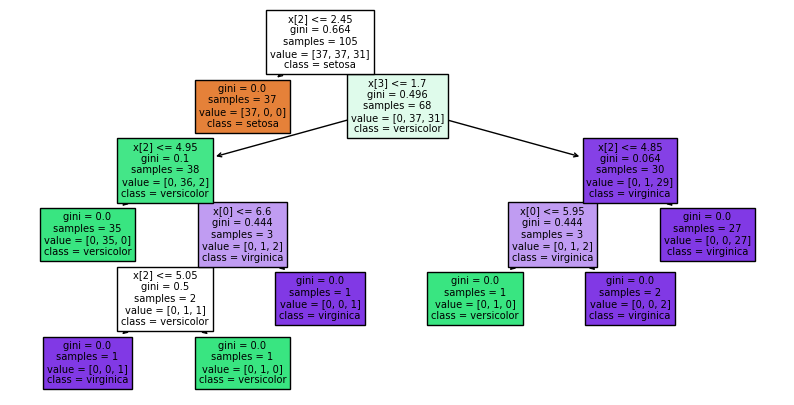

In [121]:
var = ['setosa','versicolor','virginica']
plt.figure(figsize=(10,5))
tree.plot_tree(model,class_names=var,filled=True)
plt.show()

<h3>KNN</h3>

In [124]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [126]:
y_pred = model.predict(x_test)
y_pred

array(['versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa'],
      dtype=object)

In [129]:
knn_accu = accuracy_score(y_test,y_pred)
knn_accu

0.9333333333333333

In [127]:
model.score(x_test,y_test)

0.9333333333333333

In [131]:
precision_score(y_test,y_pred,average='weighted')

0.9458333333333333

In [132]:
recall_score(y_test,y_pred,average='weighted')

0.9333333333333333

In [133]:
f1_score(y_test,y_pred,average='weighted')

0.9339244663382595

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45



In [136]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 16]], dtype=int64)

<Axes: >

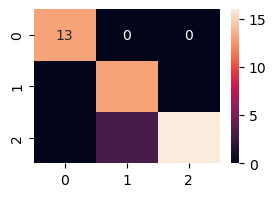

In [139]:
plt.figure(figsize=(3,2))
sns.heatmap(cm,annot=True)

<h3>K Means (Clustering)</h3>

In [161]:
data = pd.read_csv('income.csv')
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


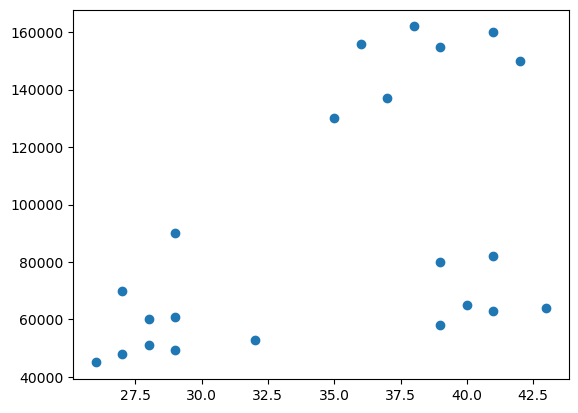

In [166]:
plt.scatter(data.Age,data[['Income($)']])

In [169]:
model = KMeans(n_clusters=3)
cluster = model.fit_predict(data[['Age','Income($)']])
cluster

C:\Users\Digvijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Digvijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [171]:
data['cluster'] = cluster
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [179]:
model.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

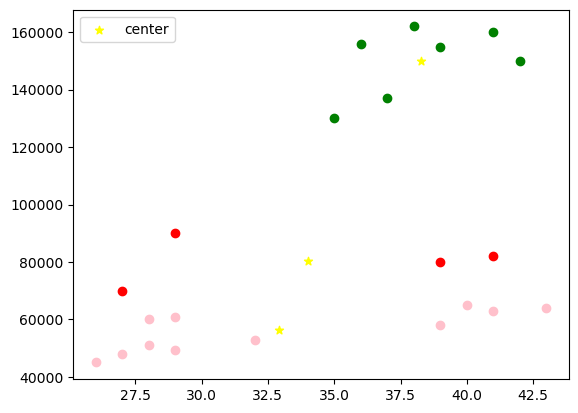

In [178]:
df0 = data[data.cluster == 0]
df1 = data[data.cluster == 1]
df2 = data[data.cluster == 2]
# print(df0)
# print(df1)
# print(df2)
plt.scatter(df0.Age,df0['Income($)'],color='red')
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='pink')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color = 'yellow' , marker='*',label='center')
plt.legend()

In [182]:
scaler = MinMaxScaler()
scaler.fit(data[['Income($)']])

MinMaxScaler()

In [183]:
data['Income($)'] = scaler.transform(data[['Income($)']])
data.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [186]:
scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [187]:
model = KMeans(n_clusters=3)
cluster = model.fit_predict(data[['Age','Income($)']])
cluster

C:\Users\Digvijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Digvijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [189]:
data['cluster'] = cluster
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [188]:
model.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

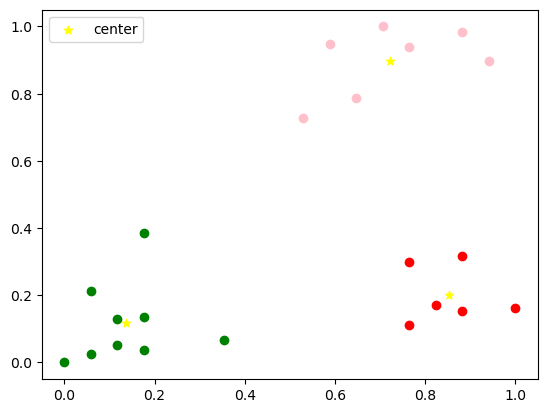

In [190]:
df0 = data[data.cluster == 0]
df1 = data[data.cluster == 1]
df2 = data[data.cluster == 2]
# print(df0)
# print(df1)
# print(df2)
plt.scatter(df0.Age,df0['Income($)'],color='red')
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='pink')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color = 'yellow' , marker='*',label='center')
plt.legend()

In [191]:
sse = []
k_range = range(1,10)

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(data[['Age','Income($)']])
    sse.append(model.inertia_)

C:\Users\Digvijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Digvijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Digvijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Digvijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

In [193]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.21066678488010526,
 0.16869711728567788,
 0.13265419827245162,
 0.10383752586603562]

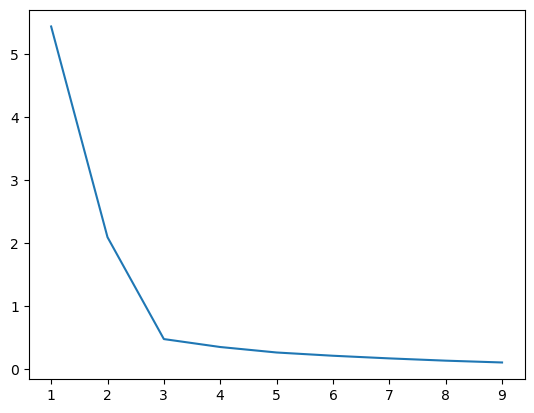

In [194]:
plt.plot(k_range,sse)

<h3>Accuracy Bar</h3>

<BarContainer object of 4 artists>

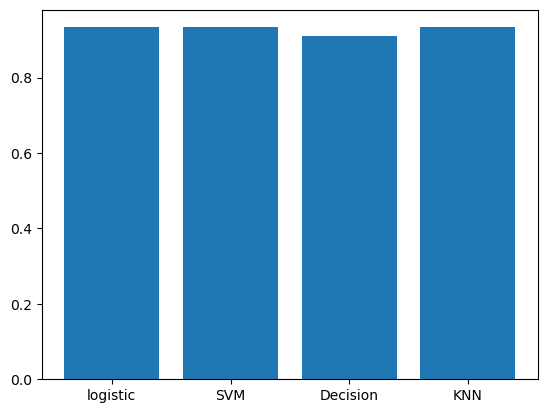

In [195]:
plt.bar(['logistic','SVM','Decision','KNN'],[logi_accu,svm_accu,dec_accu,knn_accu])